### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
from pandas.errors import SettingWithCopyWarning

warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
data = pd.read_csv('data/coupons.csv')

In [5]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [6]:
# find missing values in each column
missing_values = data.isnull().sum().dropna()
#print(missing_values)
# Find percentage of missing values in each column
missing_percent = (missing_values / len(data)) * 100
# create missing dataframe
missing_data= pd.DataFrame({"missing_values":missing_values,"missing_data_percentage":missing_percent})
# Filter records with 0 value
missing_data_filtered=missing_data[missing_data["missing_values"]>0]
print(missing_data_filtered)

                      missing_values  missing_data_percentage
car                            12576                99.148534
Bar                              107                 0.843582
CoffeeHouse                      217                 1.710817
CarryAway                        151                 1.190476
RestaurantLessThan20             130                 1.024913
Restaurant20To50                 189                 1.490066


3. Decide what to do about your missing data -- drop, replace, other...

In [95]:
# Load your dataset (replace with your actual file path if needed)
data = pd.read_csv("data/coupons.csv")

# Drop the 'car' column due to excessive missing data (~99% missing)
data_cleaned = data.drop(columns=['car'])

# Columns with low-percentage missing values (categorical frequency categories)
columns_to_impute = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20']

# Replace missing values in each with the mode (most frequent value)
for column in columns_to_impute:
    mode_value = data_cleaned[column].mode()[0]
    data_cleaned[column].fillna(mode_value, inplace=True)

# (Optional) Verify missing values are now handled
print(data_cleaned.isnull().sum())

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                       0
CoffeeHouse               0
CarryAway                 0
RestaurantLessThan20      0
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64


/var/folders/0_/4rh2qwtx1tv0jb79jy2myjk80000gn/T/ipykernel_71967/1981164966.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned[column].fillna(mode_value, inplace=True)


4. What proportion of the total observations chose to accept the coupon?



In [7]:
coupon_acceptance_rate =data['Y'].mean()
print(coupon_acceptance_rate)

0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

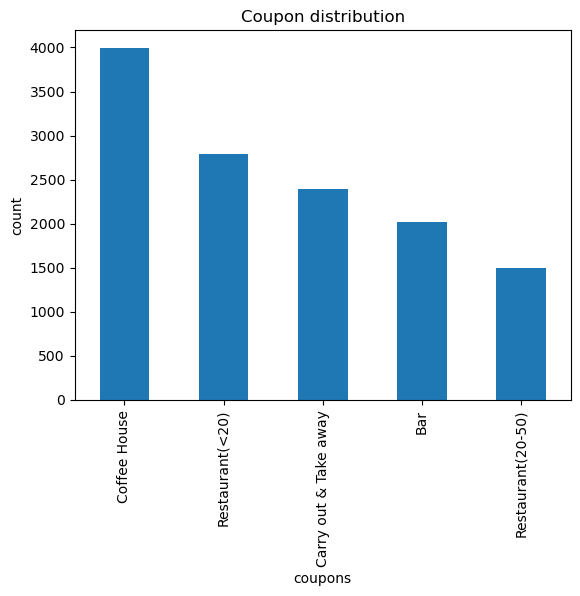

In [8]:
coupon_counts = data['coupon'].value_counts()
coupon_counts.plot(kind='bar',xlabel="coupons",ylabel="count",title="Coupon distribution")
plt.show()

6. Use a histogram to visualize the temperature column.

(array([2316.,    0.,    0.,    0.,    0., 3840.,    0.,    0.,    0.,
        6528.]),
 array([30., 35., 40., 45., 50., 55., 60., 65., 70., 75., 80.]),
 <BarContainer object of 10 artists>)

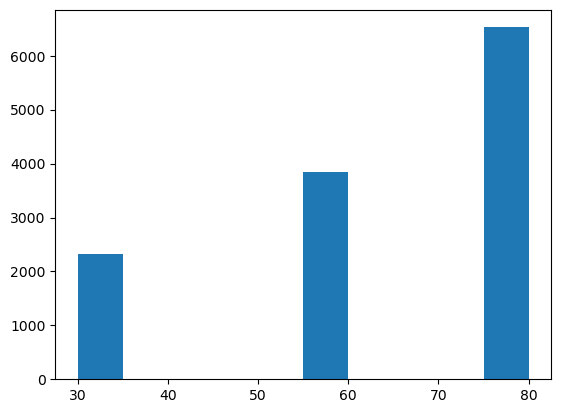

In [9]:
plt.hist(data["temperature"])

Text(0, 0.5, 'Frequency')

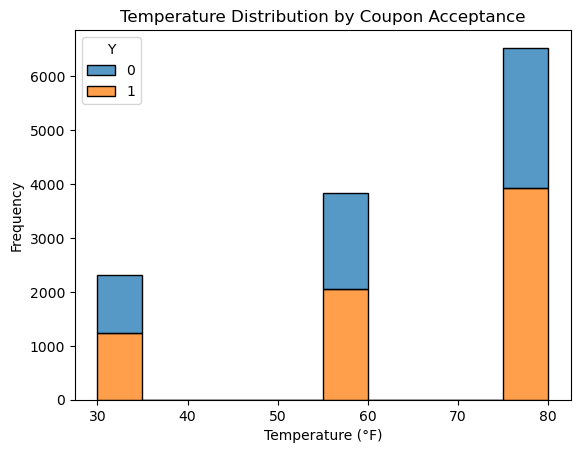

In [65]:
sns.histplot(data=data, x='temperature', hue='Y', bins=10, edgecolor='black', multiple='stack')
plt.title('Temperature Distribution by Coupon Acceptance')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')

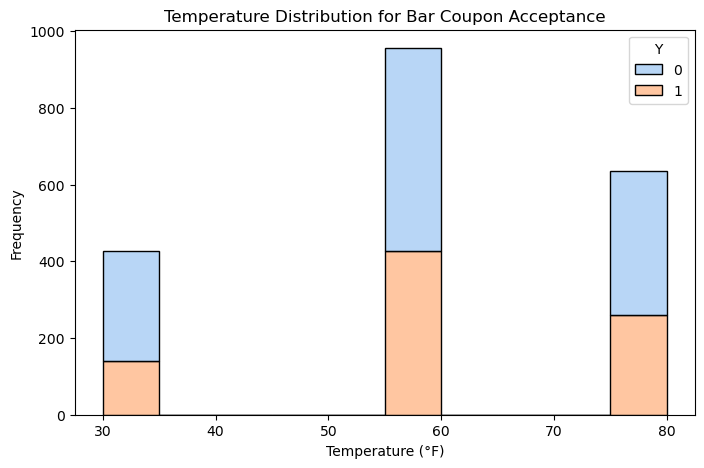

In [66]:
# Filter only for Bar coupons
bar_coupons_data = data[data['coupon'] == 'Bar']

# Create a histogram for Bar coupon by temperature and acceptance
plt.figure(figsize=(8, 5))
sns.histplot(data=bar_coupons_data, x='temperature', hue='Y', bins=10, multiple='stack',
             edgecolor='black', palette='pastel')

# Add labels and title
plt.title('Temperature Distribution for Bar Coupon Acceptance')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')

plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [58]:
bar_coupons=data[data["coupon"]=='Bar']

2. What proportion of bar coupons were accepted?


In [78]:
# Filter the data with "Bar" coupons
bar_coupons=data[data["coupon"]=='Bar']
# accepted "Bar" coupons proportion
accepted_bar_coupons=bar_coupons['Y'].mean()
print(accepted_bar_coupons)

0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [11]:
# Filter the data with "Bar" coupons
bar_coupons = data[data["coupon"]=='Bar']

#  group1 who went to bard 3 or fewer times
group_1_to_3 = bar_coupons[bar_coupons['Bar'].isin(['never', 'less1', '1~3'])]

#  group2 who went more than 3 times 
group_more_than3 = bar_coupons[bar_coupons['Bar'].isin(['4~8 ',  'gt8'])]

# Calculate coupon acceptance rates
group_1_to_3_acceptance_rate=group_1_to_3['Y'].mean()
group_more_than3_acceptance_rate =group_more_than3['Y'].mean()

print(group_1_to_3_acceptance_rate, group_more_than3_acceptance_rate)


0.37061769616026713 0.7346938775510204


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

In [28]:
# Filter the data with "Bar" coupons
bar_coupons = data[data["coupon"]=='Bar']

# Add new numeric_age column in the data set to get numberic value
age_map = {
    'below21': 20,
    '21': 21,
    '26': 26,
    '31': 31,
    '36': 36,
    '41': 41,
    '46': 46,
    '50plus': 55
}

# Add the age_numeric column to the bar_coupons dataframe
bar_coupons['age_numeric'] = bar_coupons['age'].map(age_map)
frequent_bar_visitors = bar_coupons[bar_coupons['Bar'].isin(['4~8 ',  'gt8']) & (bar_coupons['age_numeric'] > 25)]
frequent_bar_visitors_rate=frequent_bar_visitors['Y'].mean()
#print(frequent_bar_visitors)

# For the commented out line about other_bar_visitors, if you want to use it:
other_bar_visitors = data[(data["coupon"]=='Bar')& ~data.index.isin(frequent_bar_visitors.index)]
other_bar_visitors_rate=other_bar_visitors['Y'].mean()
#print(other_bar_visitors)
print(frequent_bar_visitors_rate,other_bar_visitors_rate)


0.7 0.40563663814796175


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [29]:
# read the data from file
data = pd.read_csv('data/coupons.csv')

#create group who goes to bars > once/month AND not with kids AND not in farming/fishing/forestry
target_group = data[
    (data['coupon'] == 'Bar') &
    (data['Bar'].isin(['4~8', 'gt8'])) &
    (data['passanger'] != 'Kid(s)') &
    (data['occupation'] != 'Farming Fishing & Forestry')
]
#  comparison group: all other bar coupon holders
comparison_group = data[
    (data['coupon'] == 'Bar') & ~data.index.isin(target_group.index)
]

# calculate acceptance rates
target_acceptance = target_group['Y'].mean()
comparison_acceptance = comparison_group['Y'].mean()

print(target_acceptance,comparison_acceptance)

0.774869109947644 0.3718510405257393


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [57]:
# read the data from file
data = pd.read_csv('data/coupons.csv')

# Add new numeric_age column in the data set to get numberic value
age_map = {
    'below21': 20,
    '21': 21,
    '26': 26,
    '31': 31,
    '36': 36,
    '41': 41,
    '46': 46,
    '50plus': 55
}

# Add the age_numeric column to the bar_coupons dataframe
data['age_numeric'] = data['age'].map(age_map)

# Condition 1: Go to bars > 1/month, not with kids, not widowed
condition1 = (
    data['Bar'].isin(['4~8', 'gt8']) &
    (data['passanger'] != 'Kid(s)') &
    (data['maritalStatus'] != 'Widowed')
)

# Condition 2: Go to bars > 1/month AND age < 30
condition2 = (
    data['Bar'].isin(['4~8', 'gt8']) &
    (data['age_numeric'] < 30)
)

# Condition 3: Go to cheap restaurants > 4 times/month AND income < $50K
condition3 = (
    data['RestaurantLessThan20'].isin(['4~8', 'gt8']) &
    data['income'].isin([
        'Less than $12500', '$12500 - $24999', '$25000 - $37499',
        '$37500 - $49999'
    ])
)
# Combine all conditions using OR
combined_group = data[condition1 | condition2 | condition3]

# create  the rest of the data as comparison group
comparison_group = data[~data.index.isin(combined_group.index)]

#print(combined_group)
# Calculate acceptance rates
combined_acceptance = combined_group['Y'].mean()
comparison_acceptance = comparison_group['Y'].mean()

print(combined_acceptance, comparison_acceptance)                

0.6017423771001866 0.5571277719112988


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
#Inferences
# Frequent bar visitors has high acceptance rate for coupons
# Young or socially active people are also tend to accept more coupons
# Age, marital status and spending habits influence acceptance rate

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [84]:
# read the data from file
data = pd.read_csv('data/coupons.csv')

#create group how many Male use "Carry out & Take away" coupon 
target_group = data[
    (data['coupon'] == 'Carry out & Take away') &
    (data['gender'] =='Male') 
]

#  comparison group: all other bar coupon holders
comparison_group = data[
    (data['coupon'] == 'Carry out & Take away') & ~data.index.isin(target_group.index)
]

# calculate acceptance rates
target_acceptance = target_group['Y'].mean()
comparison_acceptance = comparison_group['Y'].mean()

print(target_acceptance,comparison_acceptance)

0.7588898525585429 0.7137096774193549


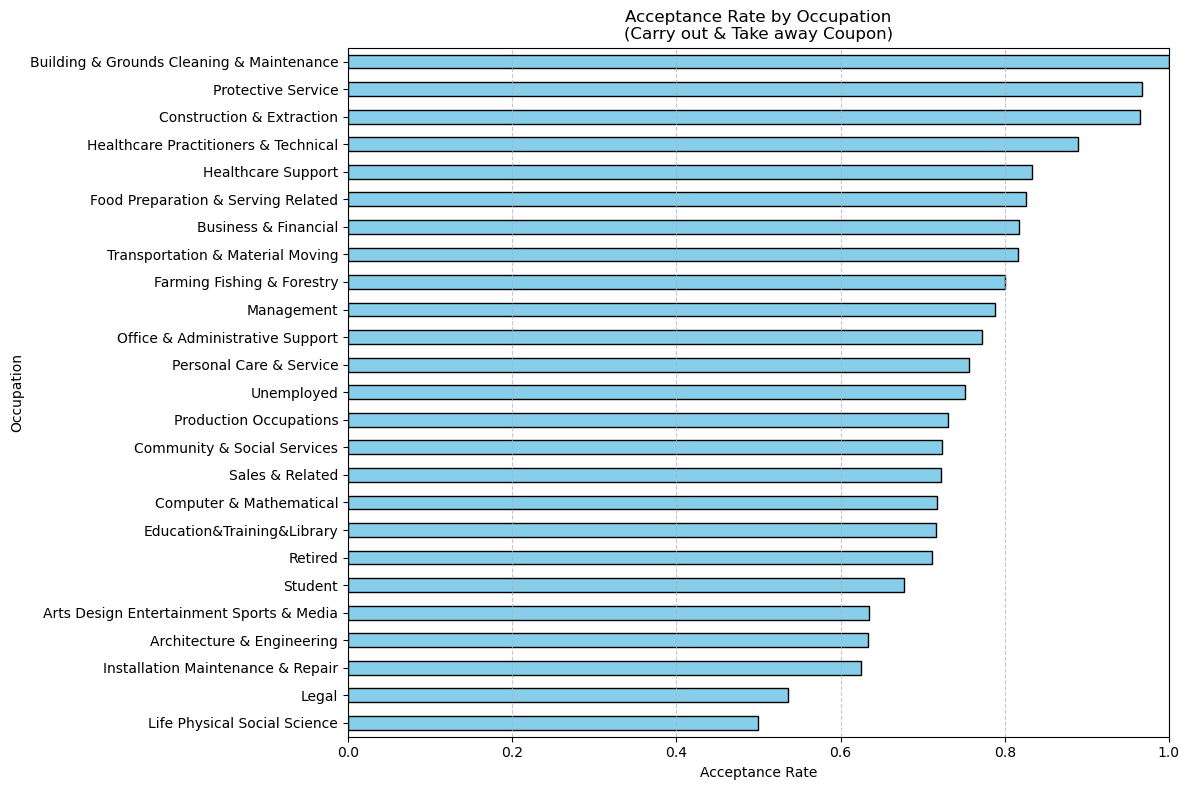

In [87]:
# Filter for "Carry out & Take away" coupon group
takeaway_df = data[data['coupon'] == 'Carry out & Take away']

# Calculate acceptance rate by occupation
acceptance_by_occupation = takeaway_df.groupby('occupation')['Y'].mean().sort_values(ascending=False)

acceptance_by_occupation
# Plot acceptance rate by occupation for "Carry out & Take away" coupon
plt.figure(figsize=(12, 8))
acceptance_by_occupation.plot(kind='barh', color='skyblue', edgecolor='black')

plt.title('Acceptance Rate by Occupation\n(Carry out & Take away Coupon)')
plt.xlabel('Acceptance Rate')
plt.ylabel('Occupation')
plt.xlim(0, 1)
plt.gca().invert_yaxis()  # Highest values on top
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

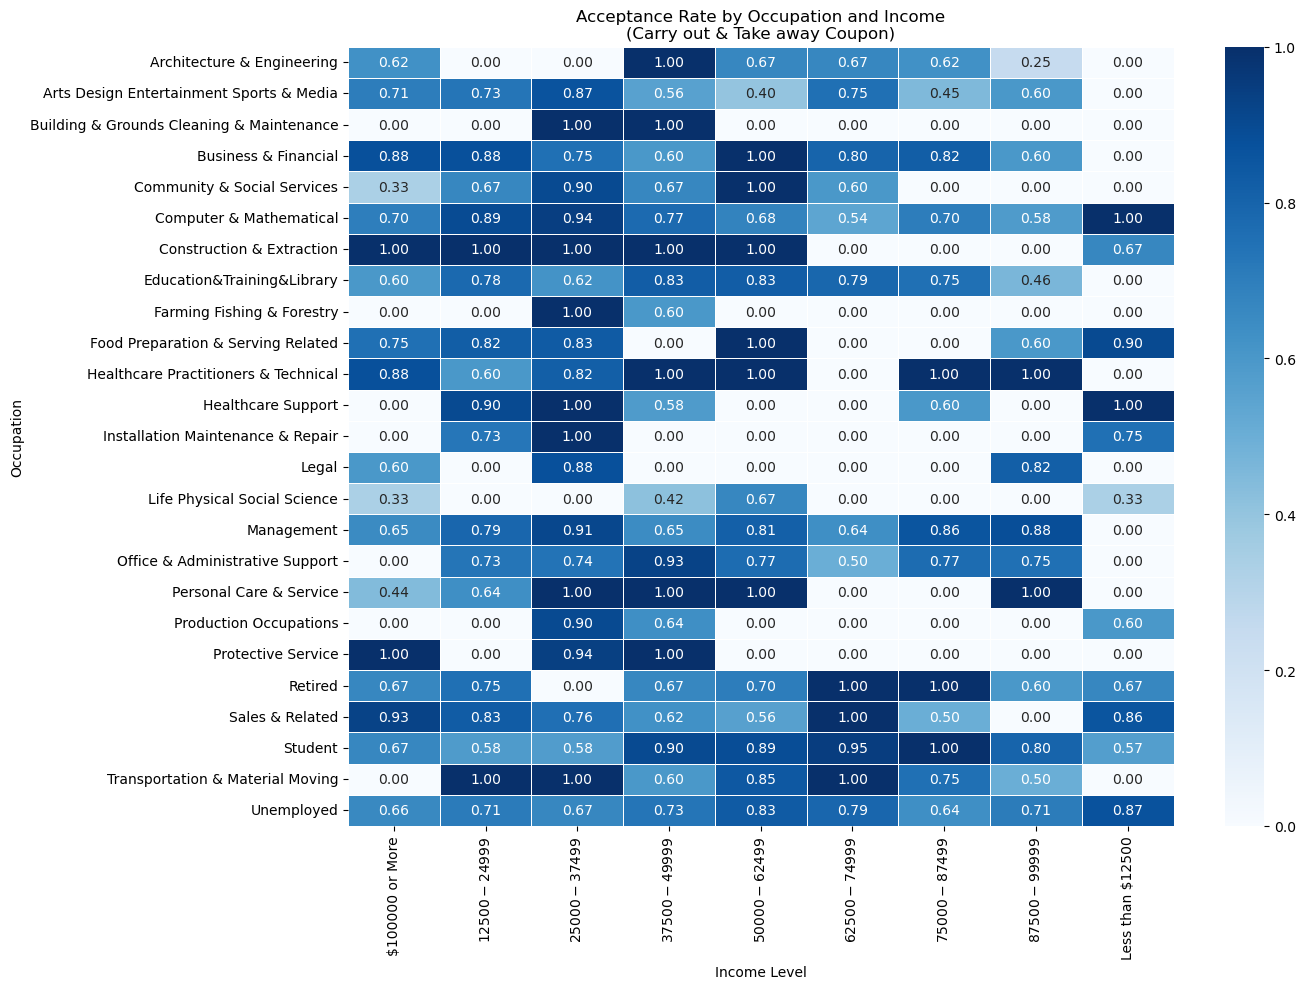

In [90]:
# Filter for "Carry out & Take away" coupon group
takeaway_df = data[data['coupon'] == 'Carry out & Take away']

# Calculate acceptance rate by occupation and income
grouped_acceptance = takeaway_df.groupby(['occupation', 'income'])['Y'].mean().unstack().fillna(0)

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(grouped_acceptance, annot=True, fmt=".2f", cmap='Blues', linewidths=0.5)

plt.title('Acceptance Rate by Occupation and Income\n(Carry out & Take away Coupon)')
plt.xlabel('Income Level')
plt.ylabel('Occupation')
plt.tight_layout()
plt.show()

In [ ]:
# Inferences
# Highest acceptance rate is for labor incentive occupation in lower to mid income bracket range
# Construction and protection food services shows highest acceptance irrespective of income bracket

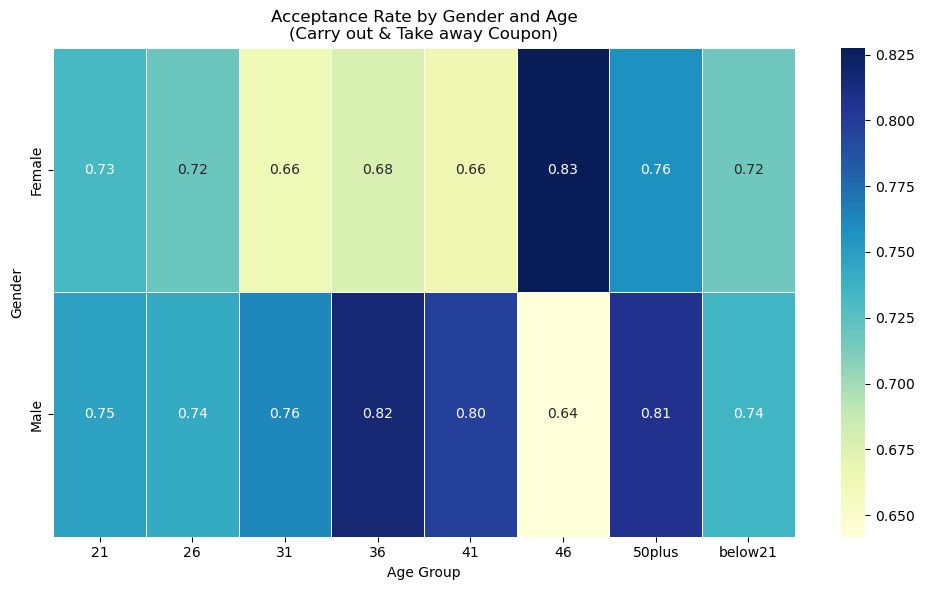

In [92]:
# read the data from file
data = pd.read_csv('data/coupons.csv')

# Filter for "Carry out & Take away" coupon group
takeaway_df = data[data['coupon'] == 'Carry out & Take away']

# Group data by gender and age and calculate acceptance rate for "Carry out & Take away"
gender_age_acceptance = takeaway_df.groupby(['gender', 'age'])['Y'].mean().unstack()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(gender_age_acceptance, annot=True, fmt=".2f", cmap='YlGnBu', linewidths=0.5)

plt.title('Acceptance Rate by Gender and Age\n(Carry out & Take away Coupon)')
plt.xlabel('Age Group')
plt.ylabel('Gender')
plt.tight_layout()
plt.show()



In [ ]:
# Inferences
# Younger Age group has higher acceptance rate across both genders
# Female in the age range 21-26 has higher acceptance rate
